# Lab 1. Introduction to Machine learning

In this Lab we will firstly see a simple example of a classification problem.

Afterwards, we will focus on three different questions related to ML:


1) Learn how to use a sklearn to solve ML tasks (classification and regression)

2) Illustrate important concepts in ML (imputation, validation, standarization, etc.) 

3) Learn how to create sophisticated ML pipelines for real-world problems

4) Introduce the keras library for deep learning


We will use material from the books:

- "Hands-On Machine Learning with Scikit-Learn and TensorFlow. Concepts, Tools, and Techniques to Build Intelligent Systems" by Aurélien Géron. http://shop.oreilly.com/product/0636920052289.do 

- "Deep Learning with Python" by F. Chollet. https://www.amazon.com/Deep-Learning-Python-Francois-Chollet/dp/1617294438

which are recommended as Bibliography of the course.


In [1]:
# We start by importing the python libraries required to solve the problems

import numpy as np
import matplotlib
from matplotlib import pylab as plt
import matplotlib.patches as mpatches

# Enables interaction with the plots
%matplotlib notebook

# These are modules contained in sklearn 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils.testing import all_estimators
from sklearn.base import ClassifierMixin

# Imputation methods
from sklearn.preprocessing import Imputer

# Methods for preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import binarize

# Feature selection Methods 
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA



# Methods for classifier validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn import metrics

# Datasets in sklearn
import sklearn.datasets as data_load

# Pipelines
from sklearn.pipeline import Pipeline

# Enables interactivity with the plots
%matplotlib notebook



In [2]:
def plot_points(points_list, labels=None, line=None):
    plt.figure()
    if labels is None:
        labels = [""] * len(points_list)
    for points, label in zip(points_list, labels):
        plt.scatter(points[0], points[1], label=label)
    plt.xlabel(r'$x$', fontsize=fsize)
    plt.ylabel(r'$y$', fontsize=fsize)
    if line is not None:
        plt.plot(line[0], line[1],'m',lw=4)
    plt.legend()
    plt.show()
        
        

In [3]:
# We create two sets of points (XA,yA)  and (XB,yB) corresponding to two different classes

number_points_Class_A = 50
number_points_Class_B = 50

# Font size
fsize = 20     

# Points in Class A
xA = 20*np.random.rand(number_points_Class_A)
shiftA = 20*np.random.rand(number_points_Class_A)
yA = (4+xA)/2.0 - shiftA - 0.1

# Points in Class B
xB = 20*np.random.rand(number_points_Class_B)
shiftB = 20*np.random.rand(number_points_Class_B)
yB = (4+xB)/2.0 + shiftB + 0.1


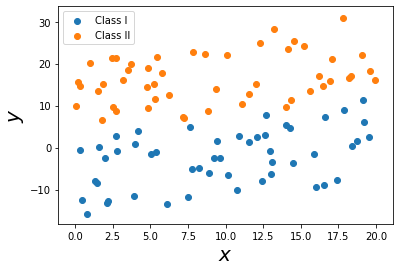

In [4]:
# The points in the two classes are visualized with different colors 
# Points in Class I in blue. Points in Class II in orange
plot_points([[xA, yA], [xB, yB]], labels=["Class I", "Class II"])


No handles with labels found to put in legend.


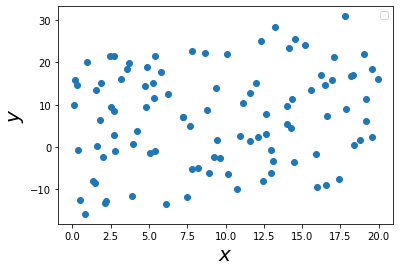

In [5]:
plot_points([[np.concatenate((xA, xB), axis=0), np.concatenate((yA, yB), axis=0)]])


No handles with labels found to put in legend.


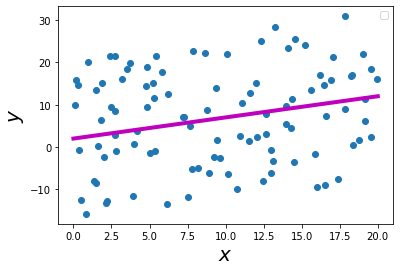

In [6]:
x1 = np.linspace(0, 20, 2000)
y1 = (4+x1)/2.0

plot_points([[np.concatenate((xA, xB), axis=0), np.concatenate((yA, yB), axis=0)]], labels=None, line=[x1, y1])

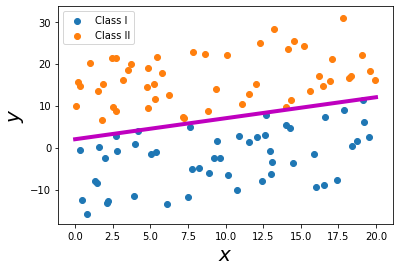

In [7]:
# We show that there exists a hyperplane that allows to perfectly divide 
# points in the two classes.
# In 2-d this hyperplane corresponds to a line that is represented in green.

plot_points([[xA, yA], [xB, yB]], labels=["Class I", "Class II"], line=[x1, y1])

In [8]:
# Now we create a more difficult classification problem
# where the two region classes overlap.

# Font size
fsize = 20     

# Points in Class A
xA1 = 20*np.random.rand(number_points_Class_A)
shiftA1 = 20*np.random.rand(number_points_Class_A)
yA1 = (4+xA1)/2.0 - shiftA1 + 5.0

# Points in Class B
xB1 = 20*np.random.rand(number_points_Class_B)
shiftB1 = 20*np.random.rand(number_points_Class_B)
yB1 = (4+xB1)/2.0 + shiftB1 - 5.0

# Hyperplane dividing the two classes
x1 = np.linspace(0, 20, 2000)
y1 = (4+x1)/2.0

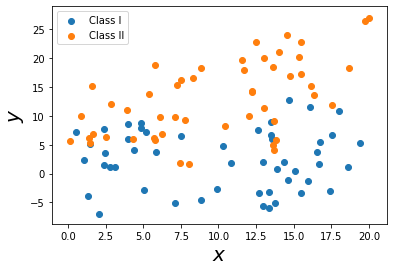

In [9]:
# The points corresponding to the two classes are plotted

plot_points([[xA1, yA1], [xB1, yB1]], labels=["Class I", "Class II"])

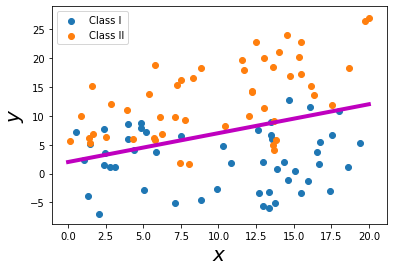

In [10]:
# We use the same hyperplane to divide points from the two classes
# However, as it can be appreciated, the classification provided by this hyperplane
# is not perfect

plot_points([[xA1, yA1], [xB1, yB1]], labels=["Class I", "Class II"], line=[x1, y1])

In [11]:
# Now we create a more difficult classification problem
# where the two region classes seem to overlap and where
# it is not evident that a linear separator exists.


# Font size
fsize = 20     

# Points in Class A
xA2 = 20*np.random.rand(number_points_Class_A)
shiftA2 = 20*np.random.rand(number_points_Class_A)
yA2 = 20*np.cos(0.2*np.pi*xA2) - shiftA2 

# Points in Class B
xB2 = 20*np.random.rand(number_points_Class_B)
shiftB2 = 20*np.random.rand(number_points_Class_B)
yB2 = 20*np.cos(0.2*np.pi*xB2) + shiftB2 

# Sinusoidal curve dividing the two classes      
x2 = np.linspace(0, 20, 2000)
y2 = 20*np.cos(0.2*np.pi*x2) 

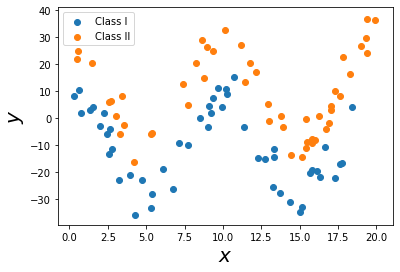

In [12]:
# The points corresponding to the two classes are plotted

plot_points([[xA2, yA2], [xB2, yB2]], labels=["Class I", "Class II"])




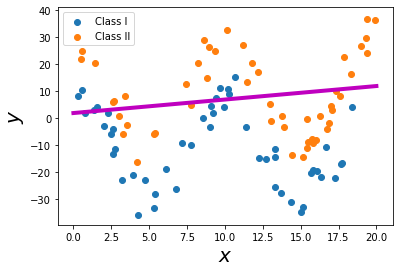

In [13]:
# Now we plot in green the same line that was previously used to classify the previous data
# It can be seen that it does not provide a good separation of the data

plot_points([[xA2, yA2], [xB2, yB2]], labels=["Class I", "Class II"], line=[x1, y1])



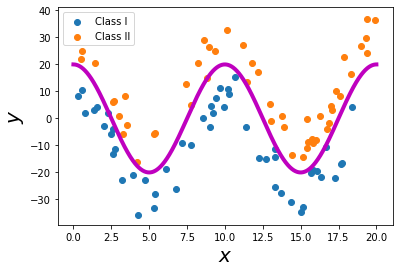

In [14]:
# Finally we also show a curve that makes a perfect separation of the data


plot_points([[xA2, yA2], [xB2, yB2]], labels=["Class I", "Class II"], line=[x2, y2])



### A very simple binary classification problem 
For our first classification problem, we will take the initial, easy problem back. As previously, we can divide create a perfect classifier by using a hyperplane (a line).

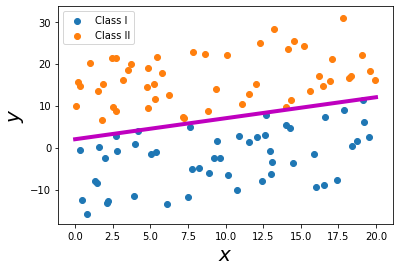

In [15]:
# In 2-d this hyperplane corresponds to a line that is represented in green.

plot_points([[xA, yA], [xB, yB]], labels=["Class I", "Class II"], line=[x1, y1])


## Learning simple classifiers using sklearn

### The common syntax for learning a classifier in sklearn implies three steps: 

- Declaration of the classifier
- Fitting the classifier from the data and the labels
- Using the classifier to predict new data

In the example below we learn a logistic regression classifier that separates the two classes presented above.

First, we will create the training data that is needed since we are working with a supervised classification algorithm. By uncommenting the "print" line you can check the size of the training data. 

In [16]:
# We define the labels for our two classes A and B. Variable c will keep the 
# labels of all points.
# The points in Class A will have label 1 assigned and the points in Class B, 
# will have label 0.

c = np.hstack((np.ones((number_points_Class_A)),np.zeros((number_points_Class_B))))
#print(c.shape)

# We create the training data concatenating examples from the two classes XA and XB
tr_data = np.hstack((np.vstack((xA,yA)),np.vstack((xB,yB)))).transpose()
#print(training_data.shape)

In [17]:
tr_data.shape

(100, 2)

We declare the classifier (it is a logistic regression classifier)

In [18]:
lr = LogisticRegression()

In [19]:
lr

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

We learn the classifier. In sklearn this is done using the function fit(data,classes)
It will update the "lr" model using the data from training_data and the labels

In [20]:
lr.fit(tr_data,c)

/home/ang3lino/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Finally, we use the logistic regression classifier lr to predict the classes of the dataset. In the example below we predict the classes of the same dataset used for training (training_data) but this is not a realistic case. Usually we predict the classes of data that was not used for training (called the test data). 

In [21]:
# Predictions of the classifier on the training data
prediction_training = lr.predict(tr_data)

In [22]:
prediction_training

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

###  Visualization of the predictions given by the classifier

A classifier is accurate if for most of the points the class predicted coincide with the real classes. In this sense, for a binary problem, each prediction can be of four types:

1) true positive: A positive point is given positive prediction

2) false positive:  A negative point is given positive prediction

3) true negative: A negative point is given negative prediction

4) false negative:  A positive point is given  negative prediction

Below, we put each classifier prediction in one of the four groups


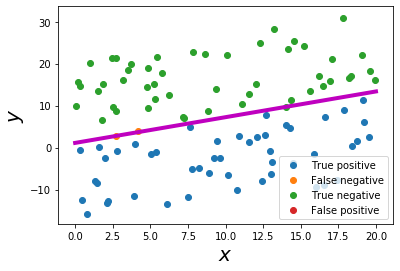

In [23]:
# Font size
fsize = 20   

# We identify the points that were correctly and wrongly classified
tp = np.where(prediction_training[:number_points_Class_A]==1)[0]  # True positive
fn = np.where(prediction_training[:number_points_Class_A]==0)[0]  # False negative
tn = number_points_Class_A+np.where(prediction_training[number_points_Class_A:]==0)[0]  # True negative
fp = number_points_Class_A+np.where(prediction_training[number_points_Class_A:]==1)[0]  # False positive

x1 = np.linspace(0, 20, 2000)
y1 = -lr.coef_[0][0]/lr.coef_[0][1]*x1 + lr.intercept_


plot_points([[tr_data[tp,0], tr_data[tp,1]], [tr_data[fn,0], tr_data[fn,1]], [tr_data[tn,0], tr_data[tn,1]], [tr_data[fp,0], tr_data[fp,1]]], 
            labels=['True positive', 'False negative', 'True negative', 'False positive'], line=[x1, y1])



In [24]:
print(lr.coef_, lr.intercept_)

[[ 0.70275601 -1.14661914]] [1.12231932]


## Implementing our own classifier

Now that we have seen how to use a Logistic Regression classifier, we are going to implement a basic classifier ourselves.

### Exercise 1

The following cells contain an incomplete implementation of a logistic regression classifier. Based on the contents learned in class, complete it, and test whether it can perform as accurately as the one from sklearn. Use the accuracy.

(This implementation is an adaptation of that found in the *Python machine learning* book, Raschka, S., & Mirjalili, V. (2017). Packt Publishing Ltd.)

In [ ]:
from functools import reduce

In [53]:
class MyLogisticRegression(object):
    def __init__(self, eta=0.01, n_iter=1000, random_state=0):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        self.rgen = np.random.RandomState(self.random_state)
        self.w = None
        self.b = None
        
    def net_input(self, X):
        return np.dot(X, self.w) + self.b
    
    def activation(self, z):
        return 1. / (1. + np.exp(-np.clip(z, -250, 250)))
        
    def fit(self, X, y):        
        self.w = self.rgen.normal(loc=0, scale=0.01, size=X.shape[1])
        self.b = self.rgen.normal(loc=0, scale=0.01, size=1)
        self.cost = []
        
        self.y = y
        
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            
            # The error is computed as the difference between the
            # prob. of the class and the prediction of the model
            errors = self.predict_proba(output) - self.predict(output)  
                                                            
            self.w += self.eta * X.T.dot(errors)
            self.b = self.eta * errors.sum()
            
            cost = (-y.dot(np.log(output)) - ((1-y).dot(np.log(1-output))))
            self.cost.append(cost)
            
        return self
    
    def predict(self, X):
        # Given the features "predict" outputs the classification given by the model
        return 1 if self.predict_proba(X) >= 0.5 else 0
    
    def ber(x, p):
        return (p ** x) * ((1 - p) ** (1 - x))
    
    def predict_proba(self, X):
        # Given the features predict_proba outputs the probability that the solution belongs to the class
        # return self.activation(np.dot(self.w, X) + self.b)
        
        #         prod = 1
        #         sigmoid = self.activation
        #         for x_i, y_i in zip(X, self.y):
        #             prod = (sigmoid(x_i) ** y_i) * ((1 - sigmoid(x_i)) ** (1 - y_i))
        #         return prod
        
        return 


The probability of an observation belonging to a certain class, as computed by Logistic Regression, can be defined as:

$$P(y|x)=sigm(wx+b)$$

In [54]:
mylr = MyLogisticRegression()

In [55]:
mylr.fit(tr_data,c)

ValueError: operands could not be broadcast together with shapes (2,) (2,100) (2,) 

In [35]:
pred = mylr.predict(tr_data)


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

### Exercise 2

Using the plot_points function, create a plot in which the the true and false positives and negatives are shown, along with the line computed by the MyLogisticRegression classifier.

In [ ]:
x1 = np.linspace(0, 20, 2000)
y1 = 

# We identify the points that were correctly and wrongly classified
tp = 
fn = 
tn = 
fp = 

plot_points()

## A real-word classification problem and more sophisticated validation schemes


sklearn also contains a number of databases that can be used to test the algorithms. We will use some of them.

### We can check which are the datasets included

In [ ]:
print("Available datasets:")
[name for name in data_load.__all__ if "load" in name]

### Inspecting the Real-World datasets

We will use the breast cancer dataset, included in UCI ML Repository https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)


It has been used for the application of ML to Cancer diagnosis and prognosis: http://pages.cs.wisc.edu/~olvi/uwmp/cancer.html

In [ ]:
# The dataset is loaded
breast_cancer_data = data_load.load_breast_cancer()

#Display options
# These options determine the way floating point numbers, 
# arrays and other NumPy objects are displayed
np.set_printoptions(suppress=True, threshold=np.nan)

It is a good practice to inspect the dataset before applying any ML technique, its header and also the characteristics of the data. 

For example, it is very important to know the number of attributes (variables), their type, and also the size of the data (number of instances). In the description that is shown below you will find this information

In [ ]:
#Some information about the dataset, understand what we are aiming for
print(breast_cancer_data["DESCR"])

We analyze more details of the database. Rows define observations (instances of our classification problem). Columns represent variables captured in each observation.


In [ ]:
breast_cancer_data["data"]

Notice in the rows shown above that the range of values change among the columns. Some columns seem to have values between 0 and 1 and others much higher values. This has to be taken into account for the application of the classifiers. 

Since this a binary problem, classes are either 0: the tumor is malign or 1: the tumor is benign 

In [ ]:
#Classes in the database
breast_cancer_data["target"]

In the previous analysis, notice that we have used:   data["data"] to visualize the features and data["target"] to see the classes. 

## Imputing missing data

Imputation methods serve to substitute missing values in the data. In the example below we define a small dataset of three variables, six instances and three missing values (NaN)

In [ ]:
my_data = np.array([[ 'NaN',   7,     6],
                    [  5   ,  89,    13],
                    [ 23   ,  12,   213],
                    [  2   ,  87, 'NaN'],
                    [  8   , 101,    71],
                    [ 13   ,'NaN',    20]])

The "Imputer" class allows to impute the missing data. It implements three strategies: "mean", "median", and "most_frequent".
If works like the classifiers:

1) Define the imputer

2) Fit the imputer to the data using the function "fit"

3) Impute the data using the function "transform"



In [ ]:
# Define the imputer
mean_imputer = Imputer(missing_values='NaN',strategy="mean",axis=0)

#  Fit the imputer
mean_imputer.fit(my_data)

# Transform (impute) the data
imputed_data = mean_imputer.transform(my_data)

In [ ]:
imputed_data

## Preprocessing the data 

Scaling the data can improve the accuracy of some classifiers. This can be done in a similar way in which we define the classifiers:

1) Define the scaler

2) Fit the scaler to the data using the function "fit"

3) Scale the data using the function "transform"

In [ ]:
# Define the scaler
scaler = preprocessing.StandardScaler()

# Fit the data to scaler
scaler.fit(X=breast_cancer_data["data"])

# Scale the data 
scaled_data = scaler.transform(X=breast_cancer_data["data"])


The sample process can be done in only two steps using the functions fit_transform()

In [ ]:
# Define the scaler
scaler = preprocessing.StandardScaler()

# Fit and scale the data 
scaled_data = scaler.fit_transform(X=breast_cancer_data["data"])


Another useful pre-processing algorithm is to binarize the data. It is NOT defined as classifiers, imputer, and scaler.

In [ ]:
binarized_data = binarize(scaled_data)
print(binarized_data)


## Feature selection 

Feature selection is an important step in traditional classifiers. I allows to reduce the dimensionality of the data. This can be done in a similar way in which we define the classifiers:

1) Define the feature selection method

2) Fit the feature-selection method to the data using the function "fit"

3) Select  the data using the function "transform"


In the example below a an information metric approach is used to select the two most informative features for the classification problem.

In [ ]:
# The feature selection method is defined
feature_selection = SelectKBest(f_classif,k=2)

# Using fit_transform we select fit the selector to the data and finally select features
new_features = feature_selection.fit_transform(scaled_data, breast_cancer_data["target"])
print(new_features)

### Exercise 3

We want to normalize the data using the "preprocessing.MinMaxScaler()" function that sets each variable to the range (0,1) and then selecting the two principal components of the data to visualize how they are related with the two classes of the Breast Cancer problem.

Below, replace the XXX in LINE 1--LINE 5. Then execute the following cell to visualize the select features.


 

In [ ]:

# The scaler is defined
min_max_scaler = XXX                              #LINE1
    
# The scaler is fitted
min_max_scaler.XXX(breast_cancer_data["data"])    #LINE2
    
# The scaler is applied
scaled_to_min_max = min_max_scaler.transform(XXX) #LINE3


# The pca is defined
XXX = PCA(n_components=2)                         #LINE4

# pca is fitted to the data
pca.fit(scaled_to_min_max)

# the 2 main principal components are extracted
reduced_data = pca.XXX(XXX)                       #LINE5


Execute the following cell to visualize the two created features

In [ ]:
# Font size
fsize = 10     

pos_positive = np.where(breast_cancer_data["target"]==1)
pos_negative = np.where(breast_cancer_data["target"]==0)

plt.figure(figsize=(7.5,3.75))
plt.plot(reduced_data[pos_positive,0], reduced_data[pos_positive,1], 'ro')
plt.plot(reduced_data[pos_negative,0], reduced_data[pos_negative,1], 'bs')

blue_patch = mpatches.Patch(color='blue', label='Class A')
red_patch = mpatches.Patch(color='red', label='Class B')
plt.legend(handles=[blue_patch,red_patch])

plt.xlabel(r'$feature_1$', fontsize=fsize)
plt.ylabel(r'$feature_2$', fontsize=fsize)


plt.show()

## Learning and validating classifiers 

One common way of evaluating the quality of a classifier is applying cross-validation.
We remind that cross-validation is a way to estimate the accuracy of a classifier
using the training data.
It works as follows:

1) First, the training data is divided into k folds.

2) Then, we repeat k times the following step: We use (k-1) folds to train a classifier
and predict the classes of intances in the other k-th fold using tha classifier. 

The procedure is done predicting every time a different fold. 

Below, we show how cross-validation is implemented in sk-learn


We define a decision tree classifier

In [ ]:
dt = DecisionTreeClassifier()

We estimate the classifier accuracy using k-fold cross-validation with k=5. The result of cross-validation will be the predictions for all instances

In [ ]:
prediction = cross_val_predict(dt,breast_cancer_data.data, 
                               breast_cancer_data.target,cv=5)

# Let us print the predictions
print(prediction)

With the prediction  and the target (true class value) we can compute different accuracy measures for the classifier.  We do this for the accuracy metric below. 

In [ ]:
dt_accuracy = metrics.accuracy_score(breast_cancer_data.target, prediction) 
print("The accuracy of the logistic regression classifier, as computed \
using 5-fold crossvalidation, is: ",dt_accuracy)

We can also compute the confusion matrix for the predictions made by the decision tree classifier

In [ ]:
dt_confusion_matrix = metrics.confusion_matrix(breast_cancer_data.target, prediction)
print("Confusion matrix for the predictions made by the logistic regression classifier:")
print(dt_confusion_matrix)

### Exercise 4
 
  Learn a classifier for the breast cancer dataset and estimate its accuracy. The classifier should have the following characteristics:
   
  1) Use a logistic regression classifier
  
  2) Do the predictions using cross-validation (number of folds k=10) 
  on the scaled (StandardScaler) data
  
  3) Compute the confusion matrix 
  
 
 Suggestions: 
 
 - Copy-paste the previous cells and substitute decision tree by logistic regression
 - Use scaled data instead of original data
 - Modify the parameters of the cross-validation to have the number of folds requested 
 


In [ ]:
lr = LogisticRegression()


# Define the scaler
scaler = preprocessing.StandardScaler()

# Fit and scale the data 
scaled_data = scaler.fit_transform(X=breast_cancer_data["data"])

prediction = cross_val_predict(lr,scaled_data, 
                               breast_cancer_data.target,cv=10)

lr_confusion_matrix = metrics.confusion_matrix(breast_cancer_data.target, prediction)
print("Confusion matrix for the predictions made by the logistic regression classifier:")
print(lr_confusion_matrix)

## Machine learning pipelines 

Machine learning pipeline allows to join in a single pipeline a number of processing steps. They sequentially apply a list of transformations and a final estimator (classifier, regression).

In the example below we define two pipelines with different components: 

In [ ]:
# Components of the first pipeline
knn = KNeighborsClassifier()    
scaler = preprocessing.StandardScaler()

# The first pipeline is defined
knn_scale_pipeline = Pipeline([("scaler", scaler), ("k-NN", knn)])


# The second pipeline is defined using components from the previous exercise.
# If you did not complete the exercise you can define the components here

#three_steps_pipeline = Pipeline([("mm_scaler", min_max_scaler),
#                                 ("pca", pca ), ("dt_classifier", dt)])



In the next cell pipeline1 is used to predict the classes of the breast cancer problem. Then, the accuracy of the predictions is computed. 

In [ ]:
pipeline1_prediction = cross_val_predict(knn_scale_pipeline,breast_cancer_data.data, 
                               breast_cancer_data.target,cv=5)

pipeline1_accuracy = metrics.accuracy_score(breast_cancer_data.target, 
                                                     pipeline1_prediction) 

print("The accuracy of the secondpipeline computed using crossvalidation is: ",
      pipeline1_accuracy)


In the next cell, pipeline2 is used to predict the classes of the breast cancer problem. Then, the accuracy of the predictions is computed. Notice the difference in the accuracies given by the two pipelines.

In [ ]:
pipeline2_prediction = cross_val_predict(three_steps_pipeline,breast_cancer_data.data, 
                               breast_cancer_data.target,cv=5)

pipeline2_accuracy = metrics.accuracy_score(breast_cancer_data.target, 
                                                     pipeline2_prediction) 

print("The accuracy of the second pipeline computed using crossvalidation is: ",
      pipeline2_accuracy)

## TPOT: Optimizing Pipelines

Finding the best combination of pre-processing and classifiers is a difficult task. Automatic Machine Learning is about of generating the optimal ML pipelines automaticly. 

Now, lets use TPOT, which is a bi-objective genetic programmig tool that generates pipelines automatically, by searching for the maximum accuracy, while also attempting to keep the pipelines simple.

We will  use the TPOT package to search for (almost) optimal pipelines

In [ ]:
# tpot is not part sklearn, we import it

from tpot import TPOTClassifier


The Tpot instance is define simmilarly to the way it is done for a regular sklearn classifier. In the example below, the evolutive algorithm will evaluate 50 pipelines (5 generations of a population of size 10)

In [ ]:
tpot = TPOTClassifier(generations=5, population_size=10, verbosity=2, random_state=16)


Then, a good pipeline is learned using the "fit" function

In [ ]:
tpot.fit(features=breast_cancer_data["data"], target=breast_cancer_data["target"])

Now we can see what the result is

In [ ]:
tpot.fitted_pipeline_.steps

### Exercise 5

Create a pipeline  that uses one scaler, one feature  selection method that produces 10 features, and a support vector machine classifier.


4.1) Compute the accuracy, precision, and recall of your pipeline. 


Suggestion: If needed, check sklearn web page help for feature extraction methods and support vector machine classifier definition. http://scikit-learn.org/0.18/index.html


Subjecting our data to a TPOT execution, with the provided configurations, suggests that the previous pipeline is the best way to build a classifier.

### Exercise 6

Moving forwawrd to a real classification problem,

5.1) Fetch a real database (different from the one used in the example) from the sklearn library (with classification purposes), understand how it is structured, and get used to it.

5.2) Define and fit a classifier using the data.

5.3) Use cross-validation to estimate the accuracy, recall, and precision of the classifier.

5.4) Use a pre-processing method to transform the data before feeding it to the classifier

5.5) Create a Pipeline which includes (at least) one preprocessing method, and a classifier.

5.6) Apply the pipeline to the data.

5.7) Use Tpot to automatically generate a pipeline



In [ ]:
#Available datasets:
[name for name in data_load.__all__ if "load" in name]

Once you have a reference value of the quality of the model, try to tune the parameters of the algorithm so that the model quality improves. Also, add a preprocessor, or change the classification algorithm.

## Optional exercises

### Exercise 7

Using the implementation completed for the MyLogisticRegression, implement a LDA classifier. Test its results by comparing it to MyLogisticRegression via accuracy (with 5-fold cross-validation) and confusions matrix. Additionally, you can generate figures with the plot_points function

Note that the LDA method for predicting the probability of an observation belonging to a class is:

$$p(y=1|x,\theta)=sigm(w^T(x-x_0))$$

where $y$ is the class, $x$ is our data, $\theta$ are the parameters of the model ($w$ and $x_0$), and $sigm$ is the sigmoid function.

One simple method for computing the parameters of the model is:

$$w=\Sigma^{-1}(\mu_1-\mu_0)$$
$$x_0=\frac{1}{2}(\mu_1+\mu_0)-(\mu_1+\mu_0)\frac{log(\frac{\pi_1}{\pi_0})}{(\mu_1-\mu_0)^T\Sigma^{-1}(\mu_1-\mu_0)}$$

where $\Sigma$ is the covariance matrix of the variables, $\mu_c$ is the mean of the variable values for class $c$, and $\pi_c$ is the $c$ class probability probability.

Tip: Assuming that the problem the classifier is going to deal with has the same number of observations for both classes, the formula for computing the $x_0$ parameter can be greatly simplified.

Tip2: To compute the inverse of a matrix (in this case $\Sigma^{-1}$), you can use the np.linalg.inv function. For computing the covariance matrix, np.cov.

In [ ]:
class MyLDAClassifier(object):
    def __init__(self):
        
    def fit(self, X, y):        
    
    def net_input(self, X):
    
    def activation(self, z):
    
    def predict(self, X):


### Exercise 8

Below we want to learn a k-nearest-neighbor classifier from the train_data and use it 
to predict the classes of the test data. The problem has two classes. The positive class
is formed by vectors with 4 or more zeros. The negative class is formed by vectors of 3 or less zeros.

Below, replace the XXX in LINE 1, LINE 2, and LINE 3 to get the predictions for the test data.



In [ ]:
# Our training dataset has 10 instances
# Each instance has 5 variables
train_data = np.array([[1,1,1,1,1],
                         [1,1,1,0,1],
                         [1,1,0,1,1],
                         [1,1,1,0,1],
                         [1,0,1,1,1],
                         [0,0,0,0,0],
                         [0,0,0,1,0],
                         [0,0,0,0,1],
                         [1,0,0,0,0],
                         [0,1,0,0,0]])

# We have the classes for the ten instances
# The first five instances belong to class 1
# the rest to class 2
train_classes = np.array([1,1,1,1,1,0,0,0,0,0])
test_data = np.random.randint(low=0,high=2,size=(10,5)) 
print("test_data", XXX)              
                        

knn = KNeighborsClassifier()      # LINE 1                                      
knn.fit(XXX,XXX)                  # LINE 2

prediction_test = knn.predict(XXX) # LINE 3

print("predictions for test data", prediction_test)
